In [66]:
!pip install umap-learn --index-url=https://artifactory.alight.com/artifactory/api/pypi/python-pypi-remote/simple --trusted-host=artifactory.alight.com

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://artifactory.alight.com/artifactory/api/pypi/python-pypi-remote/simple


In [2]:
import pandas as pd

In [3]:
import boto3
client=boto3.client('s3')
path1 = 's3://adl-core-sagemaker-studio/external/Deepali/data_for_tpm.csv'

In [4]:
data_for_tpm=pd.read_csv(path1)

In [5]:
# data_for_tpm.head()

In [6]:
data_for_tpm['input'] = data_for_tpm['input'].fillna('')

In [7]:
import bertopic
from bertopic import BERTopic
import umap.umap_ as umap
from umap import UMAP
from sklearn.feature_extraction.text import CountVectorizer
from sentence_transformers import SentenceTransformer

2023-01-12 14:47:48.170089: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-01-12 14:47:48.174061: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-12 14:47:48.174078: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [154]:
# topic_model = BERTopic(min_topic_size=300)
# topic_model_large = BERTopic("all-mpnet-base-v2")

In [8]:
umap_model = UMAP(random_state=42)
sentence_model = SentenceTransformer("sentence-transformers/all-MiniLM-L12-v2")
topic_model = BERTopic(umap_model=umap_model, embedding_model=sentence_model)

In [9]:
# topic_model.get_document_info(docs)

In [10]:
docs = data_for_tpm['input']

In [11]:
topics, probs = topic_model.fit_transform(docs)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

In [12]:
# vectorizer_model = CountVectorizer(stop_words="english", ngram_range=(1, 3), min_df=10)
# topic_model.update_topics(docs, vectorizer_model=vectorizer_model)

In [13]:
topic_prob_dict = dict()
for topic, prob in zip(topics,probs):
    topic_prob_dict[topic] = prob
#topic_prob_dict

In [21]:
df_input_topic_prob_response = pd.DataFrame()
# df_input_topic_prob_response.assign('input' = data_for_tpm['input'],
#                                     'response_text' = data_for_tpm['response_text'],
#                                    'topic' = topics, 'probability' = probs )
# df_input_topic_prob_response
df_input_topic_prob_response['entry_id']  = data_for_tpm['entry_id']
df_input_topic_prob_response['input']  = data_for_tpm['input']
df_input_topic_prob_response['response_text'] = data_for_tpm['response_text'] 
df_input_topic_prob_response['topic'] = topics
df_input_topic_prob_response['prob'] = probs
df_input_topic_prob_response.set_index(keys='entry_id', inplace = True)

df_input_topic_prob_response.head()

,input,response_text,topic,prob
entry_id,,,,
10501583,I have no clue what I am doing,I'm not sure I understand. Please try rewordin...,1299,0.717248
10713500,On the portal,I'm not sure I understand. Please try rewordin...,798,0.436702
10449211,Are you kidding,I'm not sure I understand. Please try rewordin...,1039,0.266508
10637413,I am just trying to complete the info asked fo...,I'm not sure I understand. Please try rewordin...,-1,0.000000
11769081,How to Take Action,I'm not sure I understand. Please try rewordin...,2381,0.625774


In [24]:
df_input_topic_prob_response.shape

(194069, 4)

In [16]:
# df_input_topicwise_prob_response = df_input_topic_prob_response.groupby(['topic', 'input'])['response_text']
# df_input_topicwise_prob_response = df_input_topic_prob_response.groupby(by= ["response_text"]).value_counts()

# df_input_topicwise_prob_response = df_input_topicwise_prob_response.groupby("response_text", group_keys=True)#.apply(lambda x: x)
# df_input_topicwise_prob_response = df_input_topic_prob_response.groupby(['topic','input','response_text'])
# df_input_topicwise_prob_response.head(1000)

In [17]:
# !pip install pandas_profiling --index-url=https://artifactory.alight.com/artifactory/api/pypi/python-pypi-remote/simple --trusted-host=artifactory.alight.com

In [22]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df_input_topic_prob_response, title="tpm_Pandas_Profiling_Report")
# profile

In [25]:
df_input_topic_prob_response.to_csv('input_topic_prob_response.csv')

In [167]:
# df_input_topic_prob_response[df_input_topic_prob_response['topic']==31]['input'].unique()

In [168]:
# df_input_topic_prob_response[df_input_topic_prob_response['topic']==31]['response_text'].unique()

In [246]:
dict_topic_topicname = dict()
for i,j in zip(topics,topic_model.generate_topic_labels()):
    dict_topic_topicname[i] = j
dict_topic_topicname

{49: '-1_need_coverage_did',
 34: '0___',
 14: '1_chat_contact_number contact',
 -1: '48_fax_claim_claims',
 3: '36_chat_session_chatting',
 7: '25_value_app_code',
 12: '23_form_appeal_life',
 2: '7_medical coverage_coverage_medical',
 4: '20_message number_message_invalid',
 8: '16_don_don link_understand',
 10: '17_direct_set_auto',
 35: '22_payment_submit_benefits',
 9: '26_website_site_working',
 23: '32_child_children_daughter',
 13: '33_view_view page_2019',
 11: '34_issues_website_hr',
 43: '39_useless_assistant_virtual',
 15: '40_log_url_login',
 33: '41_balance_money_funds',
 41: '42_doctor_doctors_primary',
 32: '49_case_talking_slow'}

In [241]:
topic_model.generate_topic_labels()

['-1_need_coverage_did',
 '0___',
 '1_chat_contact_number contact',
 '2_plan_tool_available',
 '3_link_working_working link',
 '4_answer_question_answer question',
 '5_need__',
 '6_enrollment_annual_annual enrollment',
 '7_medical coverage_coverage_medical',
 '8_person_representative_live',
 '9_blank_logged_load',
 '10_option_choice_options',
 '11_upload_receipts_document',
 '12_monthly_cost_charge',
 '13_error_getting error_getting',
 '14_help help_help_doesn',
 '15_information_info_match',
 '16_don_don link_understand',
 '17_direct_set_auto',
 '18_rep_check_confirmation',
 '19_print_card_insurance',
 '20_message number_message_invalid',
 '21_denied_apply_does apply',
 '22_payment_submit_benefits',
 '23_form_appeal_life',
 '24_phone_phone number_human',
 '25_value_app_code',
 '26_website_site_working',
 '27_manage_leave_company',
 '28_worthless_links_help',
 '29_helping_lisa_thanks',
 '30_cost_credit_costs',
 '31_medicare_65_premium',
 '32_child_children_daughter',
 '33_view_view page

In [170]:
# topic_model.get_representative_docs()


In [218]:
# topic_model.get_topic_info(topic=0)

In [147]:
# topic_model.get_document_info(docs)

In [219]:
# topic_model.get_topic(topic=0)

In [220]:
# df_input_topic_prob_response[df_input_topic_prob_response['topic']==0]['input'].unique()

In [221]:
# df_input_topic_prob_response[df_input_topic_prob_response['topic']==0]['response_text'].unique()

In [222]:
# topic_model.topic_representations_

In [177]:
len(topic_model.topic_embeddings_)

51

In [214]:
# topic_model.topic_embeddings_

In [179]:
type(topic_model.topic_embeddings_)

list

In [225]:
df_topics_n_topic_embedding = pd.DataFrame()
df_topics_n_topic_embedding['topics_labels'] = topic_model.generate_topic_labels()
df_topics_n_topic_embedding['topics_embedding'] = topic_model.topic_embeddings_
df_topics_n_topic_embedding.head()

,topics_labels,topics_embedding
0,-1_need_coverage_did,"[-0.01182588087214013, -0.0044205466607767155,..."
1,0___,"[-0.03239822015166282, 0.015074526891112328, 0..."
2,1_chat_contact_number contact,"[-0.02316222208054137, 0.012237530312900499, 0..."
3,2_plan_tool_available,"[-0.04589193810476824, 0.001432917608550144, -..."
4,3_link_working_working link,"[-0.019751540232111325, -0.03493000738776239, ..."


In [227]:
df_topics_n_topic_embedding.shape

(51, 2)

In [181]:
#topic_model.topic_embeddings_[0]

In [194]:
import numpy as np
# def cosine_similarity(list_topics_embeddings):
#     i = 0
#     for vec1 in topic_model.topic_embeddings_[i:-1]:
#         j = 0
#         print(f"similarity score for topic{i} with other topics:")
#         for vec2 in  topic_model.topic_embeddings_[j+1:-1]:      
#             sim_score = np.dot(vec1, vec2)/(np.linalg.norm(vec1)*np.linalg.norm(vec2))
#             print(f"similarity score of topic{i} with topic{j+1} is:", sim_score)
#             j+=1
#         i+=1

In [195]:
# cosine_similarity(topic_model.topic_embeddings_)

In [199]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

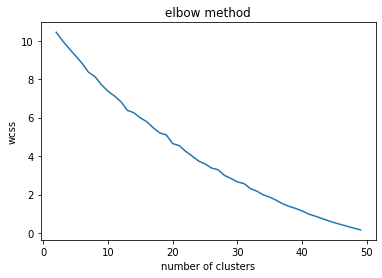

In [201]:
embeddings = np.array(topic_model.topic_embeddings_)
wcss = []
for k in range(2,50):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(embeddings)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(2,50), wcss)
plt.title('elbow method')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show

In [202]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(embeddings)

KMeans(n_clusters=10)

In [208]:
kmeans.labels_

array([2, 5, 1, 8, 6, 2, 4, 8, 3, 2, 1, 8, 2, 3, 1, 9, 2, 9, 8, 2, 3, 2,
       7, 0, 0, 2, 2, 6, 8, 9, 9, 3, 3, 2, 2, 2, 2, 1, 9, 8, 9, 1, 3, 2,
       8, 0, 2, 3, 2, 0, 2], dtype=int32)

In [235]:
topic_model.get_document_info(docs).sample()

,Document,Topic,Name,Top_n_words,Probability,Representative_document
144076,I need mailing address for AON,-1,-1_need_coverage_did_aon,need - coverage - did - aon - hospital - chang...,0.560146,False


In [233]:
df_input_topic_prob_response_cluster.head()

,input,response_text
0,I have no clue what I am doing,I'm not sure I understand. Please try rewordin...
1,On the portal,I'm not sure I understand. Please try rewordin...
2,Are you kidding,I'm not sure I understand. Please try rewordin...
3,I am just trying to complete the info asked fo...,I'm not sure I understand. Please try rewordin...
4,How to Take Action,I'm not sure I understand. Please try rewordin...


In [236]:
df_input_topic_prob_response_cluster['topic_number'] = topic_model.get_document_info(docs)['Topic']
df_input_topic_prob_response_cluster['topic_label'] = topic_model.get_document_info(docs)['Name']
df_input_topic_prob_response_cluster['topic_number'] = topic_model.get_document_info(docs)['Topic']

In [237]:
df_input_topic_prob_response_cluster.sample()

,input,response_text,topic_number,topic_label
32881,hi i got disconnected earlier,I'm not sure I understand. Please try rewordin...,36,36_chat_session_chatting_connect


In [240]:
# df_input_topic_prob_response_cluster = pd.DataFrame()
# df_input_topic_prob_response_cluster['input']  = data_for_tpm['input']
# df_input_topic_prob_response_cluster['response_text'] = data_for_tpm['response_text'] 
# df_input_topic_prob_response_cluster['topic'] = topics
# df_input_topic_prob_response_cluster['prob'] = probs
df_input_topic_prob_response_cluster['cluster'] = df_input_topic_prob_response_cluster['topic_number'].map()

TypeError: 'numpy.ndarray' object is not callable

In [226]:
df_input_topic_prob_response['cluster'] = kmeans.labels_

df_topics_n_topic_embedding.head()

ValueError: Length of values (51) does not match length of index (194069)

In [ ]:
df_topics_n_topic_embedding

In [29]:
# topic_information = topic_model.get_topic_info()

# print(type(topic_information))
# print(topic_information)

In [13]:
# topic_words = topic_model.get_topic(1)

# print(topic_words)

In [14]:
# topic_model.visualize_topics()

In [15]:
# topic_model.visualize_barchart()

In [ ]:
# !pip install bertopic --index-url=https://artifactory.alight.com/artifactory/api/pypi/python-pypi-remote/simple --trusted-host=artifactory.alight.com

In [12]:
# topic_model.visualize_documents(docs)

In [30]:
# topics_names = topic_model.get_topics()

In [31]:
# topics_names